In [1]:
pwd

'C:\\Users\\Shubham'

In [2]:
cd C:/Users/Shubham/Downloads/

C:\Users\Shubham\Downloads


# Problem Statement

### About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


## Data             

Description         |          Variable

Loan_ID            |       Unique   Loan ID

Gender             |        Male/ Female

Married            |        Applicant married (Y/N)

Dependents         |        Number of dependents

Education          |        Applicant Education (Graduate/ Under Graduate)

Self_Employed       |       Self employed (Y/N)

ApplicantIncome     |        Applicant income

CoapplicantIncome   |       Coapplicant income

LoanAmount         |        Loan amount in thousands

Loan_Amount_Term    |       Term of loan in months

Credit_History      |       credit history meets guidelines

Property_Area      |        Urban/ Semi Urban/ Rural

Loan_Status        |        Loan approved (Y/N)


In [3]:
# IMPORT libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df= pd.read_csv('train_data.csv')
df1=pd.read_csv('test_data.csv')


In [5]:
df5=pd.read_csv('test_data.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### find the null values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.shape

(614, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# visualization

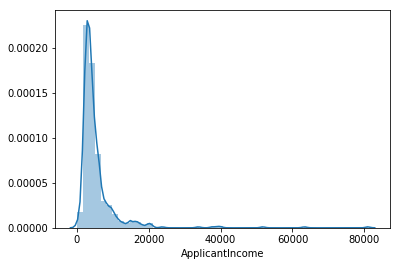

In [11]:
sns.distplot(df[df['ApplicantIncome'].notnull()]['ApplicantIncome'])

In [12]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

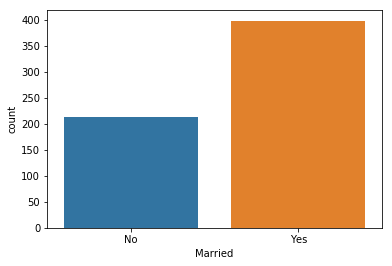

In [13]:
sns.countplot(x='Married',data=df)

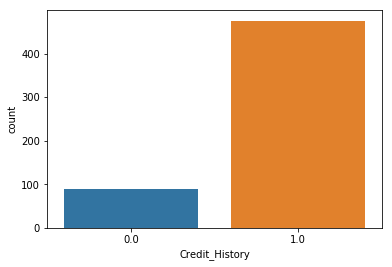

In [14]:
sns.countplot(x='Credit_History',data=df)

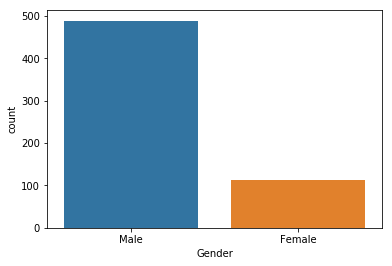

In [15]:
sns.countplot(x='Gender',data=df)

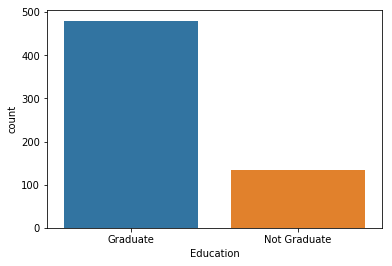

In [16]:
sns.countplot(x='Education',data=df)

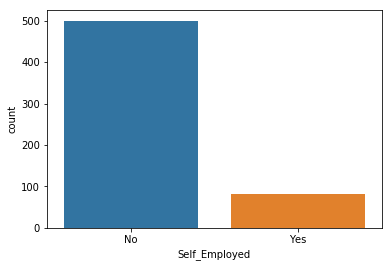

In [17]:
sns.countplot(x='Self_Employed',data=df)

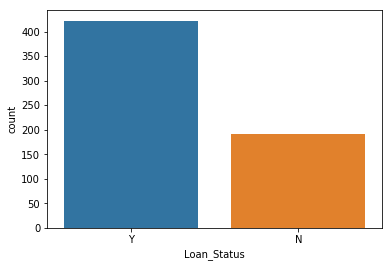

In [18]:
sns.countplot(x='Loan_Status',data=df)

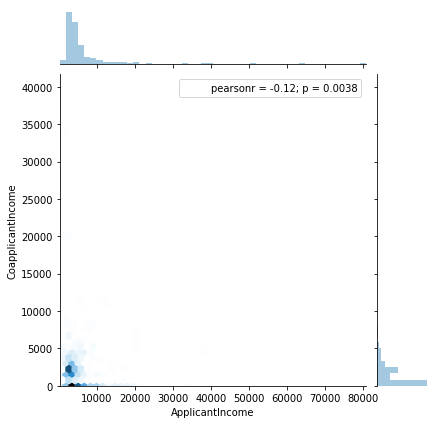

In [19]:
sns.jointplot(x=df['ApplicantIncome'],y='CoapplicantIncome',data=df,kind='hex')

#### let's find outliers

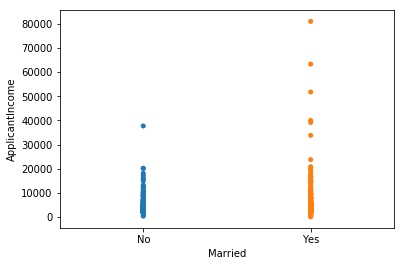

In [20]:
sns.stripplot(x='Married',y='ApplicantIncome',data=df)

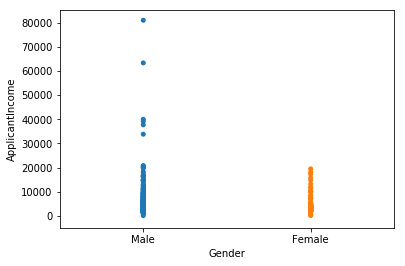

In [21]:
sns.stripplot(x='Gender',y='ApplicantIncome',data=df)

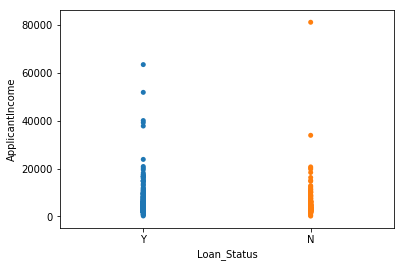

In [22]:
sns.stripplot(x='Loan_Status',y='ApplicantIncome',data=df)

In [23]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


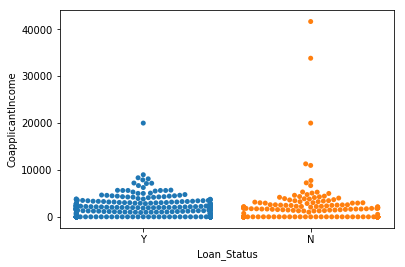

In [24]:
sns.swarmplot(x='Loan_Status',y='CoapplicantIncome',data=df)

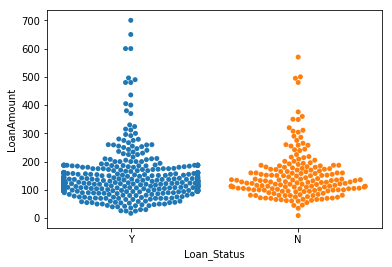

In [25]:
sns.swarmplot(x='Loan_Status',y='LoanAmount',data=df)

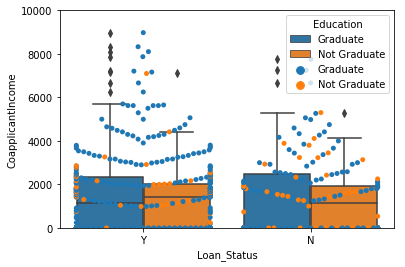

In [26]:
ax=sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df,hue='Education')
ax=sns.swarmplot(x='Loan_Status',y='CoapplicantIncome',data=df,hue='Education')
plt.ylim(0,10000)
plt.show()

#### visualize

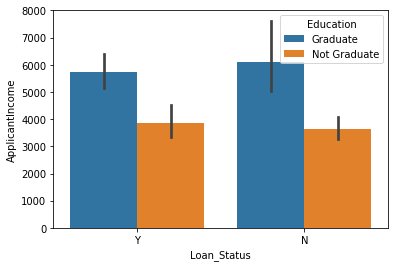

In [27]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df,hue='Education')


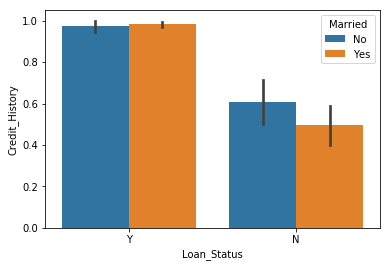

In [28]:
sns.barplot(x='Loan_Status',y='Credit_History',data=df,hue='Married')

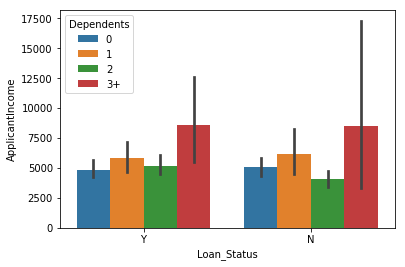

In [29]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df,hue='Dependents')


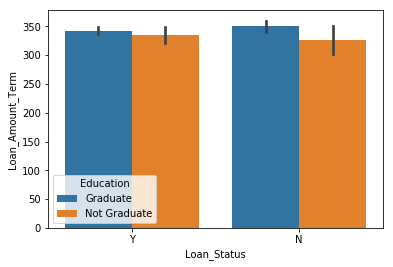

In [30]:
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',data=df,hue='Education')

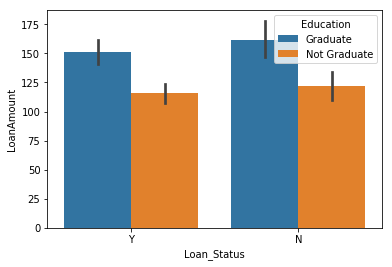

In [31]:
sns.barplot(x='Loan_Status',y='LoanAmount',data=df,hue='Education')

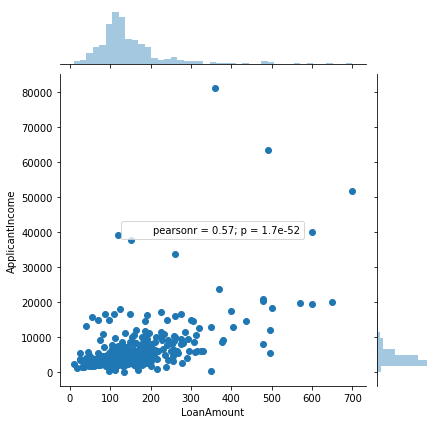

In [32]:
sns.jointplot(data=df,x='LoanAmount',y='ApplicantIncome')

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Map the data

In [34]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
df['Dependents']=df['Dependents'].map({'3+':3,'0':0,'1':1,'2':2})



df1['Gender']=df1['Gender'].map({'Male':1,'Female':0})
df1['Married']=df1['Married'].map({'Yes':1,'No':0})
df1['Education']=df1['Education'].map({'Graduate':1,'Not Graduate':0})
df1['Self_Employed']=df1['Self_Employed'].map({'Yes':1,'No':0})
df1['Property_Area']=df1['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})

df1['Dependents']=df1['Dependents'].map({'3+':3,'0':0,'1':1,'2':2})

In [35]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [36]:
df.groupby(['Loan_Status']).mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
0,0.802139,0.588542,0.752688,0.729167,0.142077,5446.078125,1877.807292,151.220994,344.064516,0.541899,1.000000
1,0.818841,0.680191,0.767554,0.805687,0.140351,5384.068720,1504.516398,144.294404,341.072464,0.981818,1.054502


#### from the above plots we conclude some points so we impute value for them according to that
gender=1 (70% men and 30% women)
dependents=0
Self_Employed=0

In [37]:
values={'Gender':1,'Married':0,'Dependents':0,'Self_Employed':0,'LoanAmount': np.mean(df['LoanAmount']),
        'Loan_Amount_Term':np.mean(df['Loan_Amount_Term'])}

df=df.fillna(value=values)


values1={'Gender':1,'Married':0,'Dependents':0,'Self_Employed':0,'LoanAmount': np.mean(df1['LoanAmount']),
        'Loan_Amount_Term':np.mean(df1['Loan_Amount_Term'])}

df1=df1.fillna(value=values1)
del df1['Loan_ID']


In [38]:
df1.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,2
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2


In [39]:
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1


#### now we try to find out the missing value of ### Credit_History with the hellp logisitics regression make new x variable 

In [40]:
X2= df[df['Credit_History'].notnull()][('Loan_Status')]
y2=  df[df['Credit_History'].notnull()]
Y2= y2['Credit_History']
Y2.shape

from sklearn.cross_validation import train_test_split

X2_train,X2_test,Y2_train,Y2_test= train_test_split(X2,Y2,test_size=.10)



Y2_train.shape


C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(507,)

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X2_train.reshape(-1, 1),Y2_train.reshape(-1, 1))
X2_train.mean()
Y2_pred= logreg.predict(X2_test.reshape(-1, 1))

Y2_pred.mean()
X3= df[df['Credit_History'].isnull()]['Loan_Status'].reshape(-1,1)

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [42]:
Y2_pred_1= logreg.predict(X3)
Y2_pred_1.sum()

50.0

### our claasifier got all predicted value 1 so we impute missing values from 1

In [43]:
df=df.fillna(value={'Credit_History':1})
df1=df1.fillna(value={'Credit_History':1})

In [44]:
del df['Loan_ID']

In [45]:
X, y= df.drop(['Loan_Status'],axis=1), df['Loan_Status']

X1 = df1

In [46]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.60, test_size=0.40, stratify=y)

In [47]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

---------------------------------------------------------------------------------------------------------------------------

#### as we can seee from correlation matrix there is a good correlation between Applicant Income and loan Amount
also we can see that Loan_Status is good correlated with Credit_History and partially correlated with Education,Married

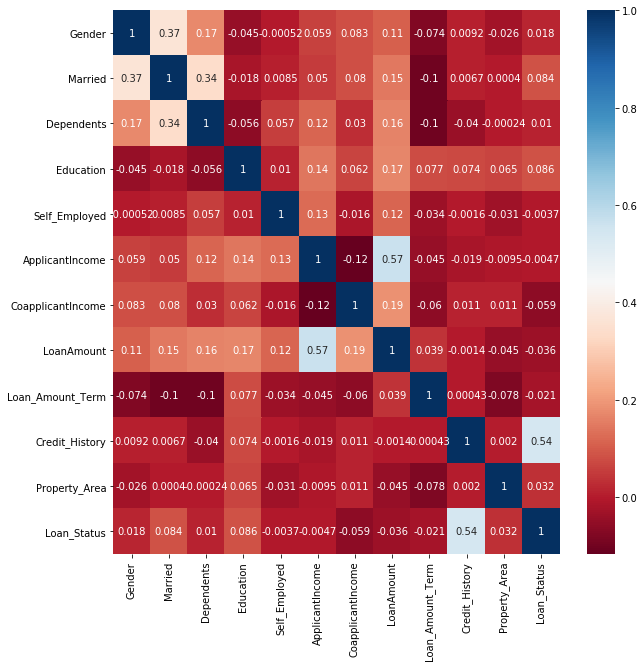

In [49]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, cmap=colormap,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [50]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [51]:
X1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Modelling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)
print('a1: ',accuracy_score(Y_test,Y_pred))
a1=accuracy_score(Y_test,Y_pred)

79.89
a1:  0.638211382114


In [54]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 3)
acc_decision_tree
print('a2: ',accuracy_score(Y_test,Y_pred))
a2=accuracy_score(Y_test,Y_pred)

a2:  0.715447154472


In [55]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log
print('a3: ',accuracy_score(Y_test,Y_pred))
a3=accuracy_score(Y_test,Y_pred)


logreg.coef_

a3:  0.80487804878


array([[ -3.35066981e-01,   5.12994684e-01,  -2.59322754e-02,
          3.90439850e-01,   7.97050826e-02,   9.25262789e-06,
         -1.09366360e-05,  -2.23138141e-03,  -3.57486900e-03,
          2.65476170e+00,  -5.94739889e-02]])

In [56]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc
print('a4: ',accuracy_score(Y_test,Y_pred))
a4=accuracy_score(Y_test,Y_pred)

a4:  0.686991869919


In [57]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian
print('a5: ',accuracy_score(Y_test,Y_pred))
a5=accuracy_score(Y_test,Y_pred)

a5:  0.80487804878


In [58]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron
print('a6: ',accuracy_score(Y_test,Y_pred))
print('a: ',accuracy_score(Y_test,Y_pred))
a6=accuracy_score(Y_test,Y_pred)

a6:  0.691056910569
a:  0.691056910569


C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [59]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc
print('a7: ',accuracy_score(Y_test,Y_pred))
a7=accuracy_score(Y_test,Y_pred)

a7:  0.686991869919


In [60]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd
print('a8: ',accuracy_score(Y_test,Y_pred))
a8=accuracy_score(Y_test,Y_pred)

a8:  0.581300813008


C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [61]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
print('a9: ',accuracy_score(Y_test,Y_pred))
a9=accuracy_score(Y_test,Y_pred)

a9:  0.80081300813


In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [a4,a1,a3,a9,a5,a6,a8,a7,a2]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.804878
4,Naive Bayes,0.804878
3,Random Forest,0.800813
8,Decision Tree,0.715447
5,Perceptron,0.691057
0,Support Vector Machines,0.686992
7,Linear SVC,0.686992
1,KNN,0.638211
6,Stochastic Gradient Decent,0.581301


In [63]:
# predicted using logistic regression classifier

Y_pred1= logreg.predict(X_test)

In [64]:
Y_pred_prob= logreg.predict_proba(X_test)

(array([  6.,   8.,   6.,   8.,   3.,   2.,   2.,   0.,   0.,   0.,   0.,
          1.,   6.,  12.,  28.,  40.,  69.,  35.,  13.,   7.]),
 array([ 0.10054401,  0.1422564 ,  0.18396878,  0.22568117,  0.26739355,
         0.30910594,  0.35081832,  0.3925307 ,  0.43424309,  0.47595547,
         0.51766786,  0.55938024,  0.60109263,  0.64280501,  0.6845174 ,
         0.72622978,  0.76794217,  0.80965455,  0.85136693,  0.89307932,
         0.9347917 ]),
 <a list of 20 Patch objects>)

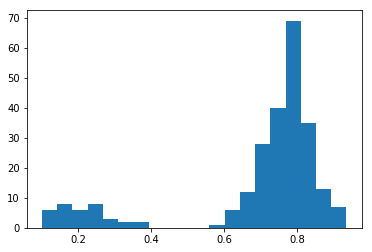

In [65]:
plt.hist(Y_pred_prob[:,1],bins=20)

In [66]:
Y_pred_prob.shape


(246, 2)

In [67]:
Y_test.shape

(246,)

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_pred_prob)
metrics.roc_auc_score(Y_test,Y_pred_prob)

NameError: name 'metrics' is not defined

In [ ]:
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(x=[0,1,2],y=[0,1,2])
plt.show()

In [69]:
from sklearn.preprocessing import binarize
Y1= binarize(Y_pred_prob,.7).reshape(-1,1)


(array([  48.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  198.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

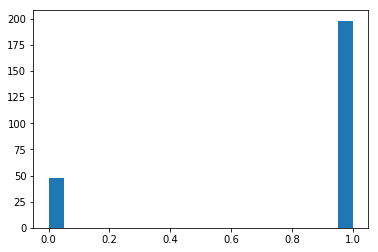

In [71]:
plt.hist(Y_pred,bins=20)

(array([ 273.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  219.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

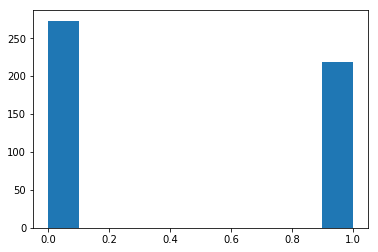

In [72]:
plt.hist(Y1)

In [73]:
Y_pred1= logreg.predict(X1)

In [74]:
Y_pred2= decision_tree.predict(X1)
Y_pred2.shape

(367,)

In [75]:
Y_pred3=random_forest.predict(X1)

In [76]:
Y_pred4=gaussian.predict(X1)

In [77]:
from sklearn import metrics

metrics.confusion_matrix(Y_pred1,Y_pred2)



array([[ 53,   6],
       [ 69, 239]], dtype=int64)

## take top three classifiers and make confusion matrix

In [78]:
#Logistic VS Gaussian

metrics.confusion_matrix(Y_pred1,Y_pred4)

array([[ 59,   0],
       [  9, 299]], dtype=int64)

In [79]:
# Logistic VS random forest

metrics.confusion_matrix(Y_pred1,Y_pred3)

array([[ 59,   0],
       [ 19, 289]], dtype=int64)

In [80]:
#random forest vs Gaussian
metrics.confusion_matrix(Y_pred3,Y_pred4)

array([[ 60,  18],
       [  8, 281]], dtype=int64)

In [81]:
Y_test.value_counts()
p=Y_test.mean()

In [82]:
print("% of chances getting loan: ",p*100)

% of chances getting loan:  68.69918699186992


In [83]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.809910 (0.047961)
LDA: 0.809910 (0.047961)
KNN: 0.638514 (0.092843)
CART: 0.635511 (0.081538)
NB: 0.790766 (0.064104)
SVM: 0.687838 (0.066506)


Confusion matrix, without normalization
[[ 38  39]
 [ 10 159]]
Normalized confusion matrix
[[ 0.49  0.51]
 [ 0.06  0.94]]


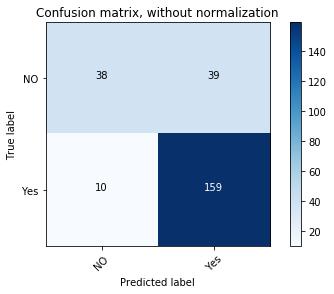

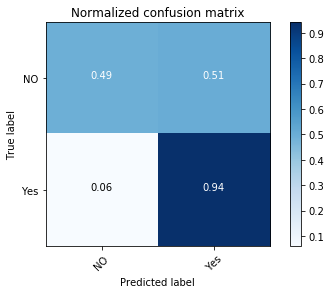

In [84]:
from sklearn import metrics

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
class_names= ['NO','Yes']
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

In [85]:
print("sensitivity1:",metrics.recall_score(Y_test,Y_pred))


sensitivity1: 0.940828402367


In [86]:
print("precision:",metrics.precision_score(Y_test,Y_pred))

precision: 0.80303030303


In [87]:
Y_pred1.shape

(367,)

In [88]:
df3=pd.DataFrame({'Loan_Status':Y_pred1})

In [89]:
df3=pd.DataFrame({'Loan_Status':Y_pred1})
df4=pd.DataFrame({'Loan_Status':Y_pred3})
df7=pd.DataFrame({'Loan_Status':Y_pred4})

In [90]:
df5['Loan_ID'].head()

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [91]:
d=pd.DataFrame(data=df5['Loan_ID'])
df3=d.join(df3)


In [92]:
df3.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [93]:
df3['Loan_Status'] = df3['Loan_Status'].apply(lambda x: 'Y' if x == 1 else 'N')


In [94]:
df3.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [95]:
df3.to_csv('loan_log_reg.csv', sep='\t')


# conclusion-    

we are getting more than **80%** accuracy by using Random Forest and Logistic Regression and around 80% by Naive Bayes, Since it is classification problem so we get less accuracy by unsuvervised models. Also our model got 97% sensitivity that means ther is 97% chances that eligible person will get loan.this model got score **.79** at Analytics Vidhya